In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField, MarkovTransitionField
from pyts.datasets import load_gunpoint
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.utils import resample
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks, NearMiss
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset,TensorDataset

from matplotlib import colors
from IPython import display
import os
from torch.utils.data.dataset import Dataset
from matplotlib.pyplot import imread
import glob
import os
import random
from sklearn.preprocessing import LabelEncoder

from torchvision.models import alexnet, vgg16, resnet152, resnet18, vgg19

%matplotlib inline

from torch.distributions.utils import lazy_property
import math
import h5py
from PIL import Image


import torch.nn.functional as nnf
from torch.utils.data import random_split
from torch.optim import SGD 
from torch.distributions import constraints
import torchvision as torchv
import torchvision.transforms as torchvt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [6]:
df_hb_train = pd.read_csv('D:/ShaftesBury/Anika_Presentation/Heartbeat-Classification-master/ptbdb_abnormal.csv',header = None)
df_hb_test = pd.read_csv('D:/ShaftesBury/Anika_Presentation/Heartbeat-Classification-master/ptbdb_normal.csv', header = None)

In [7]:
df_hb_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
df_hb_test.shape

(4046, 188)

In [9]:
df_hb_train[187].value_counts()

1.0    10506
Name: 187, dtype: int64

In [10]:
df_hb_test[187].value_counts()

0.0    4046
Name: 187, dtype: int64

In [11]:
df_hb_train[df_hb_train[187] == 3]

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187


In [8]:
df_hb_train[df_hb_train[187] == 3].shape

(641, 188)

In [9]:
df_hb_train.shape

(87554, 188)

In [10]:
df_hb_test.shape

(21892, 188)

In [11]:
df_hb_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_hb_train.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87553,0.901506,0.845886,0.800695,0.748552,0.687138,0.599073,0.512167,0.427578,0.395133,0.402086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [13]:
# omit last column as y
x_train = df_hb_train.iloc[:,:187]
x_test = df_hb_test.iloc[:,:187]

In [14]:
# For exploratory purpose only
gasf = GramianAngularField(image_size=187, method='summation')



In [15]:
gasf

GramianAngularField(image_size=187)

In [16]:
type(gasf)

pyts.image.gaf.GramianAngularField

In [17]:
gasf.shape

AttributeError: 'GramianAngularField' object has no attribute 'shape'

In [18]:
x_gasf_train = gasf.fit_transform(x_train)

In [19]:
x_gasf_train.shape

(87554, 187, 187)

In [18]:
x_gasf_test = gasf.transform(x_test)

In [20]:
x_gasf_train[87553]

array([[ 0.28965888,  0.12514941,  0.00677734, ..., -0.80301273,
        -0.80301273, -0.80301273],
       [ 0.12514941, -0.04290041, -0.16091198, ..., -0.69177294,
        -0.69177294, -0.69177294],
       [ 0.00677734, -0.16091198, -0.27665898, ..., -0.60139048,
        -0.60139048, -0.60139048],
       ...,
       [-0.80301273, -0.69177294, -0.60139048, ...,  1.        ,
         1.        ,  1.        ],
       [-0.80301273, -0.69177294, -0.60139048, ...,  1.        ,
         1.        ,  1.        ],
       [-0.80301273, -0.69177294, -0.60139048, ...,  1.        ,
         1.        ,  1.        ]])

In [21]:
x_train.values[87553, :].shape

(187,)

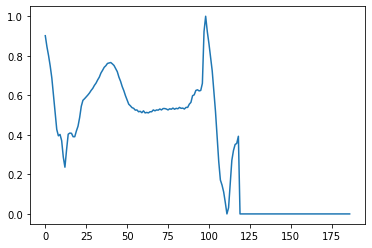

In [22]:
# Plot 1 heartbeat
x_train.values[87553, :]
plt.plot(np.arange(187), x_train.values[87553, :])

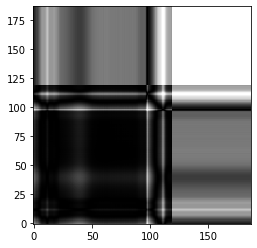

In [23]:
# GAF for 1 heartbeat
plt.imshow(x_gasf_train[87553], cmap='gray', origin='lower')

In [24]:
x_gasf_train[87553].shape

(187, 187)

In [25]:
#plt.imshow(x_gasf_test[21891], cmap='gray', origin='lower')

In [26]:
def recurrence_plot(s, eps=None, steps=None):
    result = []
    if eps==None: eps=0.1
    if steps==None: steps=10
    d = pairwise_distances(s[:, None])
    d = d / eps
    d[d > steps] = steps
    return d/5. - 1

In [27]:
result = recurrence_plot(x_train.values[87553], steps=10)

In [28]:
result.shape

(187, 187)

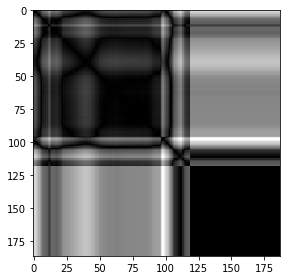

In [29]:
# Recurrence plot for 1 heartbeat
fig = plt.figure(figsize=(15,14))
ax = fig.add_subplot(2, 3, 1)
ax.imshow(result, cmap='gray')

ValueError: Found array with dim 3. check_pairwise_arrays expected <= 2.

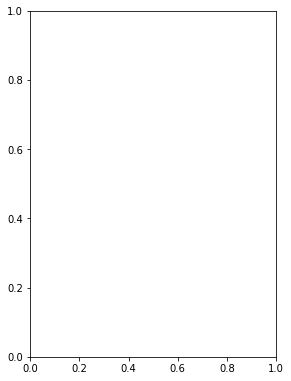

In [30]:
# Test
fig = plt.figure(figsize=(15,14))
ax = fig.add_subplot(2, 3, 1)
ax.imshow(recurrence_plot(x_train.values[25][:, None], steps=10), cmap='gray')
d = recurrence_plot(x_train.values[25][:, None], steps=10)
scaler = MinMaxScaler((-1, 1))
x = scaler.fit_transform(d.reshape(187 * 187, 1))
x

In [32]:
y_train = df_hb_train[187].values.astype(int)
y_test = df_hb_test[187].values.astype(int)

In [33]:
# upsampling to reduce class imbalance
smt2 = SMOTE(sampling_strategy={1: 30000, 2: 20000, 3: 20000, 4: 10000}, n_jobs=-1, random_state=42)
x_train_2, y_train_2 = smt2.fit_sample(x_train, y_train)



In [34]:
x_train.shape

(87554, 187)

In [35]:
x_train_2.shape

(152471, 187)

In [ ]:
gasf = GramianAngularField(image_size=150, method='summation')
x_gasf_train_2 = gasf.fit_transform(x_train_2)
x_gasf_test_2 = gasf.transform(x_test)

In [ ]:
# create placeholders, then populate with images
with h5py.File('hb_data_mit_bih_balanced_2.hdf5', mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_gasf_train_2), 224, 224), np.float32)  # 224, 224 for resnet
    hdf5_file.create_dataset("y_train", (len(y_train_2),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_gasf_test_2), 224, 224), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)
    
    transform = transforms.Compose([transforms.Resize((224, 224))])
    
    for i, (x, y) in enumerate(zip(x_gasf_train_2, y_train_2)):
        image = Image.fromarray(x.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_train"][i, ...] = t
        hdf5_file["y_train"][i] = y

    for i, (x, y) in enumerate(zip(x_gasf_test_2, y_test)):
        image = Image.fromarray(x.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_test"][i, ...] = t
        hdf5_file["y_test"][i] = y

In [ ]:
# upsampling to try with GramianAngularField method='difference'
# results are almost same for both
smt3 = SMOTE(sampling_strategy={1: 30000, 2: 20000, 3: 20000, 4: 10000}, n_jobs=-1, random_state=42)
x_train_3, y_train_3 = smt3.fit_sample(x_train, y_train)

gasf = GramianAngularField(image_size=150, method='difference')
x_gasf_train_3 = gasf.fit_transform(x_train_3)
x_gasf_test_3 = gasf.transform(x_test)

In [ ]:
with h5py.File('hb_data_mit_bih_balanced_3.hdf5', mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_gasf_train_3), 224, 224), np.float32)
    hdf5_file.create_dataset("y_train", (len(y_train_3),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_gasf_test_3), 224, 224), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)
    
    transform = transforms.Compose([transforms.Resize((224, 224))])
    
    for i, (x, y) in enumerate(zip(x_gasf_train_3, y_train_3)):
        image = Image.fromarray(x.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_train"][i, ...] = t
        hdf5_file["y_train"][i] = y

    for i, (x, y) in enumerate(zip(x_gasf_test_3, y_test)):
        image = Image.fromarray(x.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_test"][i, ...] = t
        hdf5_file["y_test"][i] = y

In [ ]:
with h5py.File('hb_data_mit_bih_balanced_rp.hdf5', mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_train_2), 224, 224), np.float32)
    hdf5_file.create_dataset("y_train", (len(y_train_2),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_test), 224, 224), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)
    
    transform = transforms.Compose([transforms.Resize((224, 224))])
    
    for i, (x, y) in enumerate(zip(x_train_2.values, y_train_2)):
        r = recurrence_plot(x, steps=10)
        image = Image.fromarray(r.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_train"][i, ...] = t
        hdf5_file["y_train"][i] = y

    for i, (x, y) in enumerate(zip(x_test.values, y_test)):
        r = recurrence_plot(x, steps=10)
        image = Image.fromarray(r.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_test"][i, ...] = t
        hdf5_file["y_test"][i] = y

In [ ]:
# Generating mixed hdf5: containing RP, GAF and mean of RP and GAF in 3 channels
# Previous ones were single channel images
with h5py.File('/media/asif/data/hb_data_mit_bih_balanced_mixed.hdf5', mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_train_3), 3, 224, 224), np.float32)
    hdf5_file.create_dataset("y_train", (len(y_train_3),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_test), 3, 224, 224), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)
    
    transform = transforms.Compose([transforms.Resize((224, 224))])
    
    for i, (x1, x2, y) in enumerate(zip(x_gasf_train_3, x_train_3.values, y_train_3)):
        image = Image.fromarray(x1.astype(float))
        t = np.array(transform(image))
        r = recurrence_plot(x2, steps=10)
        image = Image.fromarray(r.astype(float))
        t2 = np.array(transform(image))
        hdf5_file["x_train"][i, 0, ...] = t
        hdf5_file["x_train"][i, 1, ...] = t2
        hdf5_file["x_train"][i, 2, ...] = (t + t2) / 2
        hdf5_file["y_train"][i] = y

    for i, (x1, x2, y) in enumerate(zip(x_gasf_test_3, x_test.values, y_test)):
        image = Image.fromarray(x1.astype(float))
        t = np.array(transform(image))
        r = recurrence_plot(x2, steps=10)
        image = Image.fromarray(r.astype(float))
        t2 = np.array(transform(image))
        hdf5_file["x_test"][i, 0, ...] = t
        hdf5_file["x_test"][i, 1, ...] = t2
        hdf5_file["x_test"][i, 2, ...] = (t + t2) / 2
        hdf5_file["y_test"][i] = y

In [ ]:
# Hearbeat values range from 0 to 1; we will divide into quantiles and see which bin each value belongs to
# and what the probability is to transfer from 1 bin to other
# i.e if 1 value is in bin 1 and the next value is in bin 5, what is the probability of transferring from
# bin 1 to 5
# correlation matrix of probabilities is markov transition field
def get_quantiles(min_value=0, max_val=1, k=10):
    c = (max_val - min_value)/k
    b = min_value + c
    d = []
    for i in range(1, k):
        d.append(b)
        b += c
    d.append(max_val)
    return d

quantiles = get_quantiles()

def value_to_quantile(x):
    for i, k in enumerate(quantiles):
        if x <= k:
            return i
    return 0

# qv_train = np.vectorize(value_to_quantile)(x_train_3.values)
# qv_test = np.vectorize(value_to_quantile)(x_test.values)

In [33]:
def get_mtf(x, size=10):
    q = np.vectorize(value_to_quantile)(x)
    r = np.zeros((q.shape[0], q.shape[0]))
    y = np.zeros((size, size))
    for i in range(x.shape[0] - 1):
        y[q[i], q[i + 1]] += 1
    y = y / y.sum(axis=1, keepdims=True)
    y[np.isnan(y)] = 0
    
    for i in range(r.shape[0]):
        for j in range(r.shape[1]):
            r[i, j] = y[q[i], q[j]]
    return r / 5. - 1

In [34]:
# MTF for 1 image
get_mtf(x_train_3.values[0])

NameError: name 'x_train_3' is not defined

In [ ]:
plt.imshow(get_mtf(x_train_3.values[0]), cmap='gray', origin='lower')

In [ ]:
np.seterr(divide='ignore', invalid='ignore')

In [ ]:
smt3 = SMOTE(sampling_strategy={1: 30000, 2: 20000, 3: 20000, 4: 10000}, n_jobs=-1, random_state=42)
x_train_3, y_train_3 = smt3.fit_sample(x_train, y_train)

In [ ]:
with h5py.File('/media/asif/data/hb_data_mit_bih_balanced_mtf.hdf5', mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_train_3), 224, 224), np.float32)
    hdf5_file.create_dataset("y_train", (len(y_train_3),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_test), 224, 224), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)
    
    transform = transforms.Compose([transforms.Resize((224, 224))])
    
    for i, (x, y) in enumerate(zip(x_train_3.values, y_train_3)):
        mtf = get_mtf(x)
        image = Image.fromarray(mtf.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_train"][i, ...] = t
        hdf5_file["y_train"][i] = y

    for i, (x, y) in enumerate(zip(x_test.values, y_test)):
        mtf = get_mtf(x)
        image = Image.fromarray(mtf.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_test"][i, ...] = t
        hdf5_file["y_test"][i] = y

In [ ]:
# 3 channels, this time with GAF, RP and MTF
with h5py.File('/media/asif/data/hb_data_mit_bih_balanced_gaf_rp_mtf.hdf5', mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_train_3), 3, 224, 224), np.float32)
    hdf5_file.create_dataset("y_train", (len(y_train_3),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_test), 3, 224, 224), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)
    
    transform = transforms.Compose([transforms.Resize((224, 224))])
    
    for i, (x1, x2, y) in enumerate(zip(x_gasf_train_3, x_train_3.values, y_train_3)):
        image = Image.fromarray(x1.astype(float))
        t = np.array(transform(image))
        r = recurrence_plot(x2, steps=10)
        mtf = get_mtf(x2)
        image = Image.fromarray(r.astype(float))
        t2 = np.array(transform(image))
        image = Image.fromarray(mtf.astype(float))
        t3 = np.array(transform(image))
        hdf5_file["x_train"][i, 0, ...] = t
        hdf5_file["x_train"][i, 1, ...] = t2
        hdf5_file["x_train"][i, 2, ...] = t3
        hdf5_file["y_train"][i] = y

    for i, (x1, x2, y) in enumerate(zip(x_gasf_test_3, x_test.values, y_test)):
        image = Image.fromarray(x1.astype(float))
        t = np.array(transform(image))
        r = recurrence_plot(x2, steps=10)
        mtf = get_mtf(x2)
        image = Image.fromarray(r.astype(float))
        t2 = np.array(transform(image))
        image = Image.fromarray(mtf.astype(float))
        t3 = np.array(transform(image))
        hdf5_file["x_test"][i, 0, ...] = t
        hdf5_file["x_test"][i, 1, ...] = t2
        hdf5_file["x_test"][i, 2, ...] = t3
        hdf5_file["y_test"][i] = y